#### Disclaimer:  We do not own or claim ownership of Wikipedia or any of the information we have sourced from it.  We highly appreciate the work independent contributors have made and will use it responsibly.

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Scraping Wikipedia with Pandas

In [2]:
# Let's first grab the tables
wiki_link = "https://en.wikipedia.org/wiki/List_of_best-selling_game_consoles"
consoles_sold = pd.read_html(wiki_link)
print(f"We found {len(consoles_sold)} tables.")

We found 7 tables.


In [3]:
# Now let's Find the largest one
largest_index = 0

try:
    for i in range(len(consoles_sold)):
        if consoles_sold[i].count().max() > consoles_sold[largest_index].count().max():
            largest_index = i
    print(f"The largest table we grabbed is table {largest_index + 1}.  It has a size of {consoles_sold[largest_index].count().max()}.")
except KeyError:
    print(f"We already found the largest table.  It has a size of {consoles_sold.count().max()} rows.")

The largest table we grabbed is table 1.  It has a size of 40.


In [4]:
# Now to create the pandas DataFrame
try:
    consoles_sold = consoles_sold[largest_index]
    print("Converted the table successfully into a DataFrame.")
except KeyError:
    print("We already converted the table into a DataFrame.")

Converted the table successfully into a DataFrame.


In [5]:
# Save the data to a csv
try:
    print(pd.read_csv("Wiki_Scrape_clean.csv").head(3))
except:
    consoles_sold.to_csv("Wiki_Scrape_clean.csv")

        Platform      Firm  Date Released (Year AD)  Units sold (million)  \
0  PlayStation 2      Sony                     2000                 155.0   
1    Nintendo DS  Nintendo                     2004                 154.0   
2       Game Boy  Nintendo                     1989                 119.0   

  Estimate  
0      NaN  
1      NaN  
2      NaN  


# The DataFrame Table:

In [6]:
consoles_sold = pd.read_csv("Wiki_Scrape_clean.csv")
consoles_sold.head()

,Platform,Firm,Date Released (Year AD),Units sold (million),Estimate
0,PlayStation 2,Sony,2000,155.0,NaN
1,Nintendo DS,Nintendo,2004,154.0,NaN
2,Game Boy,Nintendo,1989,119.0,NaN
3,PlayStation 4,Sony,2013,110.0,NaN
4,PlayStation,Sony,1994,102.0,NaN


In [7]:
platforms_wiki = consoles_sold['Platform']
platforms_wiki

0                           PlayStation 2
1                             Nintendo DS
2                                Game Boy
3                           PlayStation 4
4                             PlayStation
5                                     Wii
6                           PlayStation 3
7                                Xbox 360
8                        Game Boy Advance
9                    PlayStation Portable
10                           Nintendo 3DS
11          Nintendo Entertainment System
12                        Nintendo Switch
13    Super Nintendo Entertainment System
14                              Xbox One 
15                           Sega Genesis
16                            Nintendo 64
17                             Atari 2600
18                                   Xbox
19                               GameCube
20                                   WiiU
21                         Sega Game Gear
22                       PlayStation Vita
23                          Master

### Now grab the content from the other video games sheet

In [8]:
the_other_table = pd.read_csv('Video_Games.csv')
the_other_table.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
platforms_base = []

for console in the_other_table['Platform']:
    if console not in platforms_base:
        platforms_base.append(console)

for code in platforms_base:
    print(code)

Wii
NES
GB
DS
X360
PS3
PS2
SNES
GBA
PS4
3DS
N64
PS
XB
PC
2600
PSP
XOne
WiiU
GC
GEN
DC
PSV
SAT
SCD
WS
NG
TG16
3DO
GG
PCFX


In [10]:
sorted_set = {}

for console in platforms_wiki:
    if console in platforms_base:
        sorted_set[console] = console
    else:
        found = False
        if ("Sega" in console):
            # Sega ones
            console_Acronym_Check = re.sub("Sega| ", "", console)

            if re.search("Saturn|Genesis", console_Acronym_Check):
                console_Acronym_Check = console_Acronym_Check[0:3].upper()
            else:
                console_Acronym_Check = re.sub("[a-z ,#]", "", console_Acronym_Check)
        elif "Xbox" == console:
            # Lazy Xbox one
            sorted_set[console] = "XB"
            continue
        elif "DS" in console:
            # Lazy DS one
            if "3" in console:
                sorted_set[console] = "3DS"
            else:
                sorted_set[console] = "DS"
            continue
        elif "Game Boy" in console:
            # Game boy lazy
            if "Advance" in console:
                sorted_set[console] = "GBA"
            else:
                sorted_set[console] = "GB"
            continue
        elif "NES" in console:
            if "Super NES" in console:
                sorted_set[console] = "SNES"
            else:
                sorted_set[console] = "NES"
        else:
            # The rest
            console_Acronym_Check = re.sub("[a-z ,#]|Atari", "", console)

        for toy in platforms_base:
            toy_Acronym_Check = re.sub("[a-z ,#]", "", toy)

            if (console_Acronym_Check == toy_Acronym_Check) and re.search(toy, console):
                found = True
                break
            elif (console_Acronym_Check == toy_Acronym_Check):
                found = True
                break

        if found:
            sorted_set[console] = toy
        else:
            print(f"Don't have {console}; '{console_Acronym_Check}' doesn't match")

Don't have Nintendo Switch; 'NS' doesn't match
Don't have Master System; 'MS' doesn't match
Don't have TurboGrafx-16; 'TG-16' doesn't match
Don't have Dreamcast; 'D' doesn't match
Don't have Super NES Classic Edition; 'D' doesn't match
Don't have Sega Pico; 'P' doesn't match
Don't have Color TV-Game; 'CTV-G' doesn't match
Don't have Intellivision; 'I' doesn't match
Don't have N-Gage; 'N-G' doesn't match
Don't have NES Classic Edition; 'N-G' doesn't match
Don't have ColecoVision; 'CV' doesn't match
Don't have Magnavox Odyssey; 'MO' doesn't match
Don't have Atari Lynx; 'L' doesn't match
Don't have Philips CD-i; 'PCD-' doesn't match
Don't have Telstar; 'T' doesn't match
Don't have Atari 5200; '5200' doesn't match


In [11]:
for i in range (len(platforms_wiki)):
    try:
        consoles_sold['Platform'][i] = sorted_set[platforms_wiki[i]]
    except KeyError:
        print(f"Key '{platforms_wiki[i]}' DNE")

Key 'Nintendo Switch' DNE
Key 'Master System' DNE
Key 'TurboGrafx-16' DNE
Key 'Dreamcast' DNE
Key 'Sega Pico' DNE
Key 'Color TV-Game' DNE
Key 'Intellivision' DNE
Key 'N-Gage' DNE
Key 'ColecoVision' DNE
Key 'Magnavox Odyssey' DNE
Key 'Atari Lynx' DNE
Key 'Philips CD-i' DNE
Key 'Telstar' DNE
Key 'Atari 5200' DNE


C:\Users\jcjwg\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
consoles_sold.head(13)

,Platform,Firm,Date Released (Year AD),Units sold (million),Estimate
0,PS2,Sony,2000,155.0,NaN
1,DS,Nintendo,2004,154.0,NaN
2,GB,Nintendo,1989,119.0,NaN
3,PS4,Sony,2013,110.0,NaN
4,PS,Sony,1994,102.0,NaN
5,Wii,Nintendo,2006,102.0,NaN
6,PS3,Sony,2006,87.0,NaN
7,X360,Microsoft,2005,54.0,NaN
8,GBA,Nintendo,2001,82.0,NaN
9,PSP,Sony,2004,81.0,estimate


In [13]:
try:
    consoles_sold = consoles_sold.drop(columns=['Estimate'])
except KeyError:
    print("Dropped it already; like Skrillex")

for row in consoles_sold.index:
    if consoles_sold['Platform'][row] not in platforms_base:
        consoles_sold = consoles_sold.drop([row])

In [14]:
consoles_sold.index = consoles_sold['Platform']
consoles_sold = consoles_sold.drop(columns=['Platform'])
consoles_sold.head(13)

,Firm,Date Released (Year AD),Units sold (million)
Platform,,,
PS2,Sony,2000,155.0
DS,Nintendo,2004,154.0
GB,Nintendo,1989,119.0
PS4,Sony,2013,110.0
PS,Sony,1994,102.0
Wii,Nintendo,2006,102.0
PS3,Sony,2006,87.0
X360,Microsoft,2005,54.0
GBA,Nintendo,2001,82.0


In [15]:
console_agg_pd = the_other_table.groupby(['Platform']).sum()
console_agg_pd.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Platform,,,,,,,,,
2600,229928.0,90.60,5.47,0.00,0.91,97.08,0.0,0.0,0.0
3DO,5984.0,0.00,0.00,0.10,0.00,0.10,0.0,0.0,0.0
3DS,1030721.0,83.49,61.48,100.67,13.36,259.09,11273.0,5069.0,16041.0
DC,103997.0,5.43,1.69,8.56,0.27,15.97,1223.0,247.0,1183.0
DS,4261381.0,382.67,188.89,175.57,59.28,807.10,45717.0,13364.0,15764.0


In [16]:
console_agg_pd = console_agg_pd.drop(columns=['Year_of_Release'])

In [17]:
console_agg_pd.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Platform,,,,,,,,
2600,90.60,5.47,0.00,0.91,97.08,0.0,0.0,0.0
3DO,0.00,0.00,0.10,0.00,0.10,0.0,0.0,0.0
3DS,83.49,61.48,100.67,13.36,259.09,11273.0,5069.0,16041.0
DC,5.43,1.69,8.56,0.27,15.97,1223.0,247.0,1183.0
DS,382.67,188.89,175.57,59.28,807.10,45717.0,13364.0,15764.0


In [18]:
merged_df = pd.merge(console_agg_pd, consoles_sold, how='inner', on=['Platform'])
merged_df = merged_df.drop(columns=['Critic_Score', 'Critic_Count', 'User_Count'])

In [19]:
merged_df.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Firm,Date Released (Year AD),Units sold (million)
Platform,,,,,,,,
2600,90.60,5.47,0.00,0.91,97.08,Atari,1977,30.0
3DS,83.49,61.48,100.67,13.36,259.09,Nintendo,2011,76.0
DS,382.67,188.89,175.57,59.28,807.10,Nintendo,2004,154.0
GB,114.32,47.82,85.12,8.20,255.45,Nintendo,1989,119.0
GBA,187.54,75.25,47.33,7.73,318.50,Nintendo,2001,82.0


ValueError: setting an array element with a sequence.

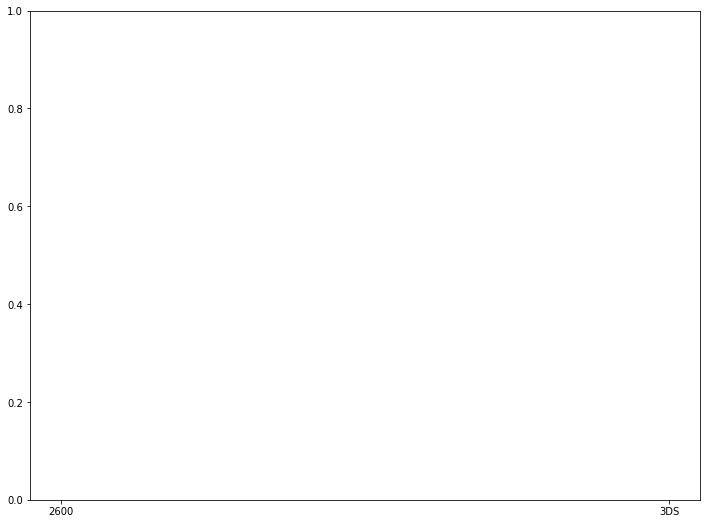

In [29]:
plt.subplots(figsize=(12,9))
ax = plt.bar(x=merged_df.index, y=merged_df['Units sold (million)'], height=merged_df['Units sold (million)'].max() + 1)
ax.set_title('Total Number of Consoles Sold', size=25)
ax.set_ylabel('Number Sold (millions)', size=25)
ax.set_xlabel('Console', size=25)
